In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec, rc
import matplotlib as mpl
import mplhep as hep
import pandas as pd
import numpy as np
import scipy as sp
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
#filepath = '../Updated signal features/npz files/'
filepath = '../bkg_npz_files/'
#METx, METy,  lep_p_E, lep_p_px, lep_p_py, lep_p_pz, lep_m_E , lep_m_px, lep_m_py, lep_m_pz

2024-01-31 12:02:15.714213: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def inv_mass_2(E, px, py, pz):
    P2 = px**2 + py**2 + pz**2
    return (E**2 - P2)
    
def load_evt(file, label, index):
    if index == None:
        f = np.load(filepath+file)
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', f[label].shape[0])
        return f[label]
    else:
        f = np.load(filepath+file)
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', len(index))
        return f[label][index]
        
def load_p4(file,labels,index,unit):
    labels = ['E','px','py','pz'] if labels == None else labels
    if index == None:
        DF = pd.DataFrame(columns= labels)
        f = np.load(filepath+file)
        DF[labels[0]] = f['E' ]*unit
        DF[labels[1]] = f['px']*unit
        DF[labels[2]] = f['py']*unit
        DF[labels[3]] = f['pz']*unit
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', DF.iloc[:,0].shape[0])
        return DF
    else:
        DF = pd.DataFrame(columns= labels)
        f = np.load(filepath+file)
        DF[labels[0]] = f['E' ][index]*unit
        DF[labels[1]] = f['px'][index]*unit
        DF[labels[2]] = f['py'][index]*unit
        DF[labels[3]] = f['pz'][index]*unit
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', len(index))
        return DF

In [7]:
%%time
GeV = 0.001
LeptonP = load_p4('LeptonP.npz', ['lp_E','lp_px','lp_py','lp_pz'],None , GeV)
LeptonM = load_p4('LeptonM.npz', ['lm_E','lm_px','lm_py','lm_pz'],None, GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(['px','py']):
    MET['MET_'+j] = load_evt('MET.npz',j,GeV)
#Higgs = mf.load_particle('Higgs.npz', None, GeV)
#WBosonP = mf.load_particle('WpBoson.npz', None, GeV)
#WBosonM = mf.load_particle('WmBoson.npz', None, GeV)
#diLepton = mf.load_particle('diLepton.npz',None, GeV)
NeutrinoP = load_p4('LpNu.npz', ['np_E','np_px','np_py','np_pz'],None, GeV)
NeutrinoM = load_p4('LmNu.npz', ['nm_E','nm_px','nm_py','nm_pz'],None, GeV)
diNeutrino = pd.DataFrame()
diNeutrino['diNu_E'  ] = NeutrinoP['np_E' ]+NeutrinoM['nm_E' ]
diNeutrino['diNu_px' ] = NeutrinoP['np_px']+NeutrinoM['nm_px']
diNeutrino['diNu_py' ] = NeutrinoP['np_py']+NeutrinoM['nm_py']
diNeutrino['diNu_pz' ] = NeutrinoP['np_pz']+NeutrinoM['nm_pz']
diNeutrino['diNu_m2' ] = inv_mass_2(diNeutrino['diNu_E'],diNeutrino['diNu_px'],diNeutrino['diNu_py'],diNeutrino['diNu_pz'])
print('>>>>>>>>>> DONE <<<<<<<<<<')

Loaded E, px, py, pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  5475536
Loaded E, px, py, pz from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  5475536


TypeError: object of type 'float' has no len()

In [130]:
cm_data = [[0.2422, 0.1504, 0.6603],
[0.2444, 0.1534, 0.6728],
[0.2464, 0.1569, 0.6847],
[0.2484, 0.1607, 0.6961],
[0.2503, 0.1648, 0.7071],
[0.2522, 0.1689, 0.7179],
[0.254, 0.1732, 0.7286],
[0.2558, 0.1773, 0.7393],
[0.2576, 0.1814, 0.7501],
[0.2594, 0.1854, 0.761],
[0.2611, 0.1893, 0.7719],
[0.2628, 0.1932, 0.7828],
[0.2645, 0.1972, 0.7937],
[0.2661, 0.2011, 0.8043],
[0.2676, 0.2052, 0.8148],
[0.2691, 0.2094, 0.8249],
[0.2704, 0.2138, 0.8346],
[0.2717, 0.2184, 0.8439],
[0.2729, 0.2231, 0.8528],
[0.274, 0.228, 0.8612],
[0.2749, 0.233, 0.8692],
[0.2758, 0.2382, 0.8767],
[0.2766, 0.2435, 0.884],
[0.2774, 0.2489, 0.8908],
[0.2781, 0.2543, 0.8973],
[0.2788, 0.2598, 0.9035],
[0.2794, 0.2653, 0.9094],
[0.2798, 0.2708, 0.915],
[0.2802, 0.2764, 0.9204],
[0.2806, 0.2819, 0.9255],
[0.2809, 0.2875, 0.9305],
[0.2811, 0.293, 0.9352],
[0.2813, 0.2985, 0.9397],
[0.2814, 0.304, 0.9441],
[0.2814, 0.3095, 0.9483],
[0.2813, 0.315, 0.9524],
[0.2811, 0.3204, 0.9563],
[0.2809, 0.3259, 0.96],
[0.2807, 0.3313, 0.9636],
[0.2803, 0.3367, 0.967],
[0.2798, 0.3421, 0.9702],
[0.2791, 0.3475, 0.9733],
[0.2784, 0.3529, 0.9763],
[0.2776, 0.3583, 0.9791],
[0.2766, 0.3638, 0.9817],
[0.2754, 0.3693, 0.984],
[0.2741, 0.3748, 0.9862],
[0.2726, 0.3804, 0.9881],
[0.271, 0.386, 0.9898],
[0.2691, 0.3916, 0.9912],
[0.267, 0.3973, 0.9924],
[0.2647, 0.403, 0.9935],
[0.2621, 0.4088, 0.9946],
[0.2591, 0.4145, 0.9955],
[0.2556, 0.4203, 0.9965],
[0.2517, 0.4261, 0.9974],
[0.2473, 0.4319, 0.9983],
[0.2424, 0.4378, 0.9991],
[0.2369, 0.4437, 0.9996],
[0.2311, 0.4497, 0.9995],
[0.225, 0.4559, 0.9985],
[0.2189, 0.462, 0.9968],
[0.2128, 0.4682, 0.9948],
[0.2066, 0.4743, 0.9926],
[0.2006, 0.4803, 0.9906],
[0.195, 0.4861, 0.9887],
[0.1903, 0.4919, 0.9867],
[0.1869, 0.4975, 0.9844],
[0.1847, 0.503, 0.9819],
[0.1831, 0.5084, 0.9793],
[0.1818, 0.5138, 0.9766],
[0.1806, 0.5191, 0.9738],
[0.1795, 0.5244, 0.9709],
[0.1785, 0.5296, 0.9677],
[0.1778, 0.5349, 0.9641],
[0.1773, 0.5401, 0.9602],
[0.1768, 0.5452, 0.956],
[0.1764, 0.5504, 0.9516],
[0.1755, 0.5554, 0.9473],
[0.174, 0.5605, 0.9432],
[0.1716, 0.5655, 0.9393],
[0.1686, 0.5705, 0.9357],
[0.1649, 0.5755, 0.9323],
[0.161, 0.5805, 0.9289],
[0.1573, 0.5854, 0.9254],
[0.154, 0.5902, 0.9218],
[0.1513, 0.595, 0.9182],
[0.1492, 0.5997, 0.9147],
[0.1475, 0.6043, 0.9113],
[0.1461, 0.6089, 0.908],
[0.1446, 0.6135, 0.905],
[0.1429, 0.618, 0.9022],
[0.1408, 0.6226, 0.8998],
[0.1383, 0.6272, 0.8975],
[0.1354, 0.6317, 0.8953],
[0.1321, 0.6363, 0.8932],
[0.1288, 0.6408, 0.891],
[0.1253, 0.6453, 0.8887],
[0.1219, 0.6497, 0.8862],
[0.1185, 0.6541, 0.8834],
[0.1152, 0.6584, 0.8804],
[0.1119, 0.6627, 0.877],
[0.1085, 0.6669, 0.8734],
[0.1048, 0.671, 0.8695],
[0.1009, 0.675, 0.8653],
[0.0964, 0.6789, 0.8609],
[0.0914, 0.6828, 0.8562],
[0.0855, 0.6865, 0.8513],
[0.0789, 0.6902, 0.8462],
[0.0713, 0.6938, 0.8409],
[0.0628, 0.6972, 0.8355],
[0.0535, 0.7006, 0.8299],
[0.0433, 0.7039, 0.8242],
[0.0328, 0.7071, 0.8183],
[0.0234, 0.7103, 0.8124],
[0.0155, 0.7133, 0.8064],
[0.0091, 0.7163, 0.8003],
[0.0046, 0.7192, 0.7941],
[0.0019, 0.722, 0.7878],
[0.0009, 0.7248, 0.7815],
[0.0018, 0.7275, 0.7752],
[0.0046, 0.7301, 0.7688],
[0.0094, 0.7327, 0.7623],
[0.0162, 0.7352, 0.7558],
[0.0253, 0.7376, 0.7492],
[0.0369, 0.74, 0.7426],
[0.0504, 0.7423, 0.7359],
[0.0638, 0.7446, 0.7292],
[0.077, 0.7468, 0.7224],
[0.0899, 0.7489, 0.7156],
[0.1023, 0.751, 0.7088],
[0.1141, 0.7531, 0.7019],
[0.1252, 0.7552, 0.695],
[0.1354, 0.7572, 0.6881],
[0.1448, 0.7593, 0.6812],
[0.1532, 0.7614, 0.6741],
[0.1609, 0.7635, 0.6671],
[0.1678, 0.7656, 0.6599],
[0.1741, 0.7678, 0.6527],
[0.1799, 0.7699, 0.6454],
[0.1853, 0.7721, 0.6379],
[0.1905, 0.7743, 0.6303],
[0.1954, 0.7765, 0.6225],
[0.2003, 0.7787, 0.6146],
[0.2061, 0.7808, 0.6065],
[0.2118, 0.7828, 0.5983],
[0.2178, 0.7849, 0.5899],
[0.2244, 0.7869, 0.5813],
[0.2318, 0.7887, 0.5725],
[0.2401, 0.7905, 0.5636],
[0.2491, 0.7922, 0.5546],
[0.2589, 0.7937, 0.5454],
[0.2695, 0.7951, 0.536],
[0.2809, 0.7964, 0.5266],
[0.2929, 0.7975, 0.517],
[0.3052, 0.7985, 0.5074],
[0.3176, 0.7994, 0.4975],
[0.3301, 0.8002, 0.4876],
[0.3424, 0.8009, 0.4774],
[0.3548, 0.8016, 0.4669],
[0.3671, 0.8021, 0.4563],
[0.3795, 0.8026, 0.4454],
[0.3921, 0.8029, 0.4344],
[0.405, 0.8031, 0.4233],
[0.4184, 0.803, 0.4122],
[0.4322, 0.8028, 0.4013],
[0.4463, 0.8024, 0.3904],
[0.4608, 0.8018, 0.3797],
[0.4753, 0.8011, 0.3691],
[0.4899, 0.8002, 0.3586],
[0.5044, 0.7993, 0.348],
[0.5187, 0.7982, 0.3374],
[0.5329, 0.797, 0.3267],
[0.547, 0.7957, 0.3159],
[0.5609, 0.7943, 0.305],
[0.5748, 0.7929, 0.2941],
[0.5886, 0.7913, 0.2833],
[0.6024, 0.7896, 0.2726],
[0.6161, 0.7878, 0.2622],
[0.6297, 0.7859, 0.2521],
[0.6433, 0.7839, 0.2423],
[0.6567, 0.7818, 0.2329],
[0.6701, 0.7796, 0.2239],
[0.6833, 0.7773, 0.2155],
[0.6963, 0.775, 0.2075],
[0.7091, 0.7727, 0.1998],
[0.7218, 0.7703, 0.1924],
[0.7344, 0.7679, 0.1852],
[0.7468, 0.7654, 0.1782],
[0.759, 0.7629, 0.1717],
[0.771, 0.7604, 0.1658],
[0.7829, 0.7579, 0.1608],
[0.7945, 0.7554, 0.157],
[0.806, 0.7529, 0.1546],
[0.8172, 0.7505, 0.1535],
[0.8281, 0.7481, 0.1536],
[0.8389, 0.7457, 0.1546],
[0.8495, 0.7435, 0.1564],
[0.86, 0.7413, 0.1587],
[0.8703, 0.7392, 0.1615],
[0.8804, 0.7372, 0.165],
[0.8903, 0.7353, 0.1695],
[0.9, 0.7336, 0.1749],
[0.9093, 0.7321, 0.1815],
[0.9184, 0.7308, 0.189],
[0.9272, 0.7298, 0.1973],
[0.9357, 0.729, 0.2061],
[0.944, 0.7285, 0.2151],
[0.9523, 0.7284, 0.2237],
[0.9606, 0.7285, 0.2312],
[0.9689, 0.7292, 0.2373],
[0.977, 0.7304, 0.2418],
[0.9842, 0.733, 0.2446],
[0.99, 0.7365, 0.2429],
[0.9946, 0.7407, 0.2394],
[0.9966, 0.7458, 0.2351],
[0.9971, 0.7513, 0.2309],
[0.9972, 0.7569, 0.2267],
[0.9971, 0.7626, 0.2224],
[0.9969, 0.7683, 0.2181],
[0.9966, 0.774, 0.2138],
[0.9962, 0.7798, 0.2095],
[0.9957, 0.7856, 0.2053],
[0.9949, 0.7915, 0.2012],
[0.9938, 0.7974, 0.1974],
[0.9923, 0.8034, 0.1939],
[0.9906, 0.8095, 0.1906],
[0.9885, 0.8156, 0.1875],
[0.9861, 0.8218, 0.1846],
[0.9835, 0.828, 0.1817],
[0.9807, 0.8342, 0.1787],
[0.9778, 0.8404, 0.1757],
[0.9748, 0.8467, 0.1726],
[0.972, 0.8529, 0.1695],
[0.9694, 0.8591, 0.1665],
[0.9671, 0.8654, 0.1636],
[0.9651, 0.8716, 0.1608],
[0.9634, 0.8778, 0.1582],
[0.9619, 0.884, 0.1557],
[0.9608, 0.8902, 0.1532],
[0.9601, 0.8963, 0.1507],
[0.9596, 0.9023, 0.148],
[0.9595, 0.9084, 0.145],
[0.9597, 0.9143, 0.1418],
[0.9601, 0.9203, 0.1382],
[0.9608, 0.9262, 0.1344],
[0.9618, 0.932, 0.1304],
[0.9629, 0.9379, 0.1261],
[0.9642, 0.9437, 0.1216],
[0.9657, 0.9494, 0.1168],
[0.9674, 0.9552, 0.1116],
[0.9692, 0.9609, 0.1061],
[0.9711, 0.9667, 0.1001],
[0.973, 0.9724, 0.0938],
[0.9749, 0.9782, 0.0872],
[0.9769, 0.9839, 0.0805]]
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

my_cmap = LinearSegmentedColormap.from_list('name', ['#3e4989','#31688e','#26828e','#1f9e89','#35b779','#6ece58','#b5de2b','#fde725'])

(413553,)
(413553,)


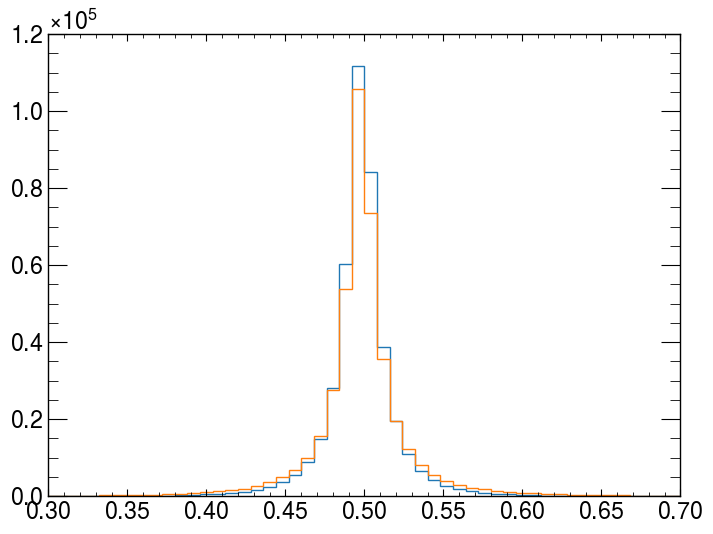

In [310]:
f = np.load('npy_files/sig_pz.npz')
g = np.load('npy_files/bkg_pz.npz')
f.files
print(f['truth'].shape)
print(f['pred'].shape)
plt.hist(f['pred'],bins=50,histtype='step',range=[0.3,0.7])
plt.hist(f['truth'],bins=50,histtype='step',range=[0.3,0.7])
plt.show()

In [197]:
def inv_mass_2(E, px, py, pz):
    P2 = px**2 + py**2 + pz**2
    return (E**2 - P2)
    
def load_evt(file, label, index):
    if index == None:
        f = np.load(filepath+file)
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', f[label].shape[0])
        return f[label]
    else:
        f = np.load(filepath+file)
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', len(index))
        return f[label][index]
        
def load_p4(file,labels,index,unit):
    labels = ['E','px','py','pz'] if labels == None else labels
    if index == None:
        DF = pd.DataFrame(columns= labels)
        f = np.load(filepath+file)
        DF[labels[0]] = f['E' ]*unit
        DF[labels[1]] = f['px']*unit
        DF[labels[2]] = f['py']*unit
        DF[labels[3]] = f['pz']*unit
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', DF.iloc[:,0].shape[0])
        return DF
    else:
        DF = pd.DataFrame(columns= labels)
        f = np.load(filepath+file)
        DF[labels[0]] = f['E' ][index]*unit
        DF[labels[1]] = f['px'][index]*unit
        DF[labels[2]] = f['py'][index]*unit
        DF[labels[3]] = f['pz'][index]*unit
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', len(index))
        return DF

In [303]:
f= np.load('npy_files/cut_id_bool.npz')
f.files
for i in f.files:
    print('cut '+i,':\n\t',np.unique(f[i],return_counts=True))
all_cut_index = f['lep_PT'] & f['diLep_mass'] & f['MET']# & f['diLep_PT'] & f['diLep_dPhi'] & f['diLep_MET_dPhi'] 
print('\n\t',np.unique(all_cut_index,return_counts=True))
#cut_pre = cut_pre_pt_lead & cut_pre_pt_sub & cut_pre_dilep_m & cut_pre_pt_miss
np.unique(all_cut_index,return_counts=True)

cut lep_eta :
	 (array([False,  True]), array([ 592355, 2336507]))
cut lep_PT :
	 (array([False,  True]), array([1322264, 1606598]))
cut MET :
	 (array([False,  True]), array([ 284319, 2644543]))
cut diLep_mass :
	 (array([False,  True]), array([ 534836, 2394026]))
cut diLep_PT :
	 (array([False,  True]), array([ 631011, 2297851]))
cut diLep_dPhi :
	 (array([False,  True]), array([ 792636, 2136226]))
cut diLep_MET_dPhi :
	 (array([False,  True]), array([ 520347, 2408515]))

	 (array([False,  True]), array([1790709, 1138153]))


(array([False,  True]), array([1790709, 1138153]))

In [304]:
%%time

GeV = 0.001
LeptonP = load_p4('LeptonP.npz', ['lp_E','lp_px','lp_py','lp_pz'] , all_cut_index.tolist(), GeV)
LeptonM = load_p4('LeptonM.npz', ['lm_E','lm_px','lm_py','lm_pz'], all_cut_index.tolist(), GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(['px','py']):
    MET['MET_'+j] = load_evt('MET.npz',j,all_cut_index.tolist())*GeV
#Higgs = mf.load_particle('Higgs.npz', None, GeV)
#WBosonP = mf.load_particle('WpBoson.npz', None, GeV)
#WBosonM = mf.load_particle('WmBoson.npz', None, GeV)
#diLepton = mf.load_particle('diLepton.npz',None, GeV)
NeutrinoP = load_p4('LpNu.npz', ['np_E','np_px','np_py','np_pz'] , all_cut_index.tolist(), GeV)
NeutrinoM = load_p4('LmNu.npz', ['nm_E','nm_px','nm_py','nm_pz'] , all_cut_index.tolist(), GeV)
diNeutrino = pd.DataFrame()
diNeutrino['diNu_E'  ] = NeutrinoP['np_E' ]+NeutrinoM['nm_E' ]
diNeutrino['diNu_px' ] = NeutrinoP['np_px']+NeutrinoM['nm_px']
diNeutrino['diNu_py' ] = NeutrinoP['np_py']+NeutrinoM['nm_py']
diNeutrino['diNu_pz' ] = NeutrinoP['np_pz']+NeutrinoM['nm_pz']
diNeutrino['diNu_m2' ] = inv_mass_2(diNeutrino['diNu_E'],diNeutrino['diNu_px'],diNeutrino['diNu_py'],diNeutrino['diNu_pz'])
print('>>>>>>>>>> DONE <<<<<<<<<<')

Loaded E, px, py, pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E, px, py, pz from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928862
Loaded py from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928862
Loaded E, px, py, pz from LpNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E, px, py, pz from LmNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
>>>>>>>>>> DONE <<<<<<<<<<
CPU times: user 4.21 s, sys: 160 ms, total: 4.37 s
Wall time: 4.14 s


In [305]:
print(LeptonP.columns)
print(LeptonM.columns)
print(NeutrinoP.columns)
print(NeutrinoM.columns)
print(MET.columns)
Dataset = pd.merge(LeptonP , LeptonM, how='outer', left_index=True, right_index=True)
Dataset = pd.merge(MET     , Dataset, how='outer', left_index=True, right_index=True)
Dataset = pd.merge(diNeutrino['diNu_pz'],Dataset, how='outer', left_index=True, right_index=True)
Dataset.describe()

Index(['lp_E', 'lp_px', 'lp_py', 'lp_pz'], dtype='object')
Index(['lm_E', 'lm_px', 'lm_py', 'lm_pz'], dtype='object')
Index(['np_E', 'np_px', 'np_py', 'np_pz'], dtype='object')
Index(['nm_E', 'nm_px', 'nm_py', 'nm_pz'], dtype='object')
Index(['MET_px', 'MET_py'], dtype='object')


,diNu_pz,MET_px,MET_py,lp_E,lp_px,lp_py,lp_pz,lm_E,lm_px,lm_py,lm_pz
count,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06
mean,2.996869e-01,-2.023163e-02,1.418727e-03,9.671567e+01,-1.753556e-02,-1.485957e-03,2.415165e-01,9.652489e+01,-1.322935e-02,3.101434e-02,9.857322e-02
std,2.556336e+02,4.001343e+01,4.004542e+01,1.239836e+02,2.654900e+01,2.652480e+01,1.527003e+02,1.232823e+02,2.654063e+01,2.651570e+01,1.520134e+02
min,-3.724896e+03,-7.011635e+02,-1.011480e+03,1.500272e+01,-6.775440e+02,-5.162718e+02,-2.449836e+03,1.500439e+01,-5.988651e+02,-3.947965e+02,-2.445477e+03
25%,-7.446479e+01,-2.929437e+01,-2.926953e+01,3.372342e+01,-1.803471e+01,-1.800634e+01,-4.054277e+01,3.368389e+01,-1.800871e+01,-1.797780e+01,-4.050212e+01
50%,1.679062e-01,-1.701562e-02,-4.818481e-03,5.476153e+01,-1.251064e-02,1.213970e-02,5.788476e-02,5.465194e+01,-1.105983e-02,4.534390e-02,6.360454e-02
75%,7.493925e+01,2.924418e+01,2.923864e+01,1.063875e+02,1.800158e+01,1.800916e+01,4.091857e+01,1.061252e+02,1.798095e+01,1.805413e+01,4.072817e+01
max,3.760952e+03,7.917826e+02,8.692037e+02,2.838006e+03,5.393957e+02,5.822423e+02,2.833088e+03,2.675194e+03,8.355693e+02,5.790039e+02,2.674680e+03


In [6]:
LeptonM.describe()

,lm_E,lm_px,lm_py,lm_pz
count,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06
mean,9.652489e+01,-1.322935e-02,3.101434e-02,9.857322e-02
std,1.232823e+02,2.654063e+01,2.651570e+01,1.520134e+02
min,1.500439e+01,-5.988651e+02,-3.947965e+02,-2.445477e+03
25%,3.368389e+01,-1.800871e+01,-1.797780e+01,-4.050212e+01
50%,5.465194e+01,-1.105983e-02,4.534390e-02,6.360454e-02
75%,1.061252e+02,1.798095e+01,1.805413e+01,4.072817e+01
max,2.675194e+03,8.355693e+02,5.790039e+02,2.674680e+03


In [306]:
N_evts=100000
RS_x= RobustScaler()
MS_x = MinMaxScaler()
input = RS_x.fit_transform(Dataset.iloc[::,::])
input = MS_x.fit_transform(input)
#RS_y = RobustScaler()
#MS_y = MinMaxScaler()
#label = RS_x.fit_transform(Dataset.loc[sample_evt,'diNu_pz'].to_numpy().reshape(-1, 1))
#label = MS_x.fit_transform(label)

In [8]:
model = tf.keras.models.load_model('DNN_pz.h5')
model.summary()
pz_pred = model.predict(input[::,1::])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 flatten_2 (Flatten)         (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                176       
                                                                 
 dense_11 (Dense)            (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 4)                 68        
                                                                 
 dense_13 (Dense)            (None, 4)                 20  

2024-01-23 01:45:02.971981: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


3125/3125 [==============================] - 3s 924us/step


In [174]:
from sklearn.metrics import mean_squared_error


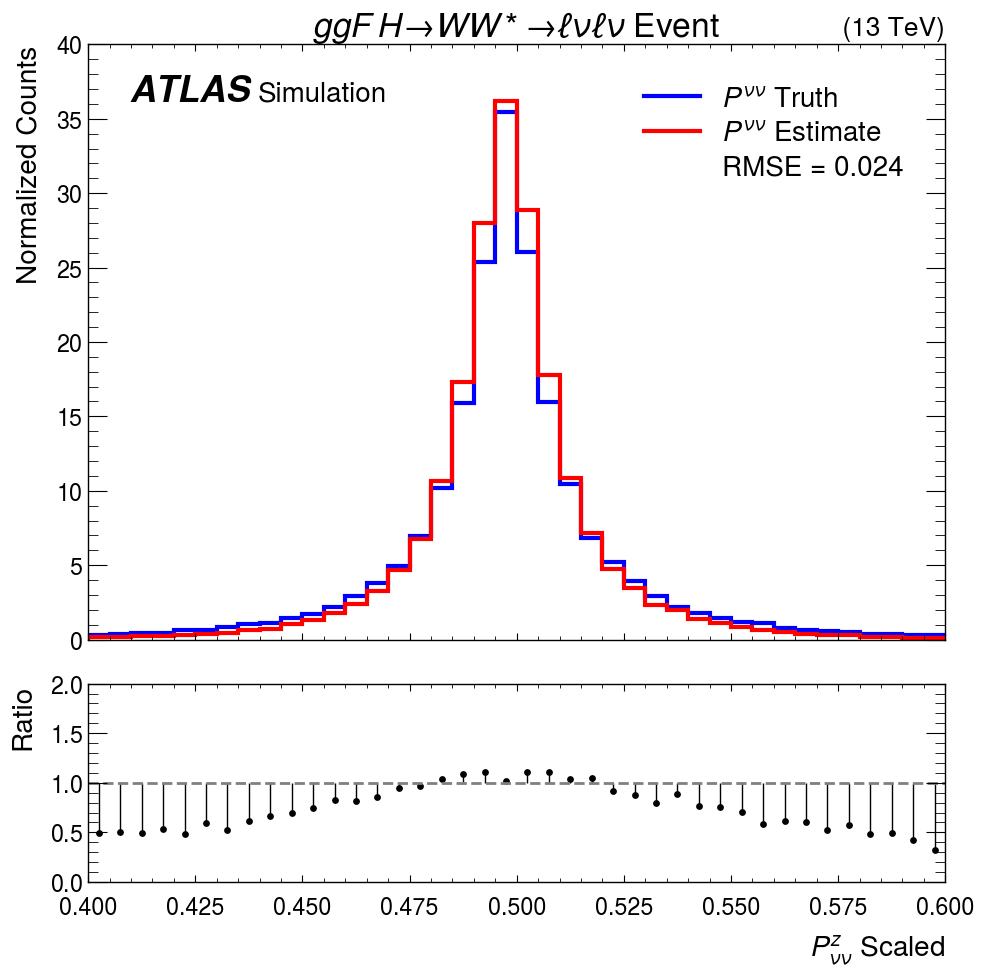

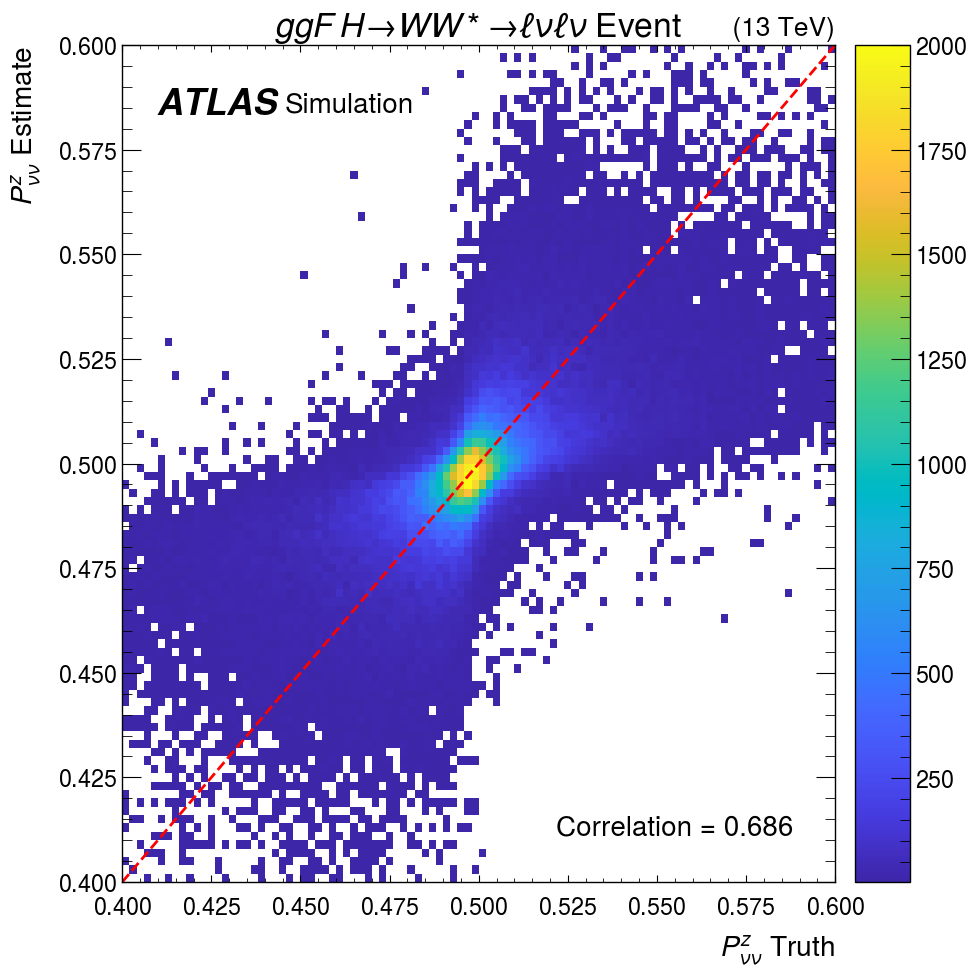

In [192]:
N_evts=100000
sig_sample_evt = np.random.choice(len(f['truth']),N_evts,replace=False)
sig_rms = mean_squared_error(f['truth'][sig_sample_evt], f['pred'][sig_sample_evt], squared=False)
sig_cor = np.corrcoef(f['truth'][sig_sample_evt], f['pred'][sig_sample_evt])[0,1]
plt.style.use("default")
plt.style.use(hep.style.ATLAS)
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(10,10),gridspec_kw={'height_ratios': [6,2]},sharex=True,tight_layout=True)
ax = ax.flatten()
hep.atlas.label(ax=ax[0],loc=1,fontsize=20)
truth_bar, truth_bin = np.histogram(f['truth'][sig_sample_evt],bins=40,range=[0.4,0.6],density=True)#,histtype='step',label = 'MET')
est_bar  ,   est_bin = np.histogram(f['pred'][sig_sample_evt],bins=40,range=[0.4,0.6],density=True)#,histtype='step',label = 'MET')
hep.histplot(truth_bar,truth_bin,label=r'$P^{\nu\nu}$ Truth',ax=ax[0],lw=3,color='b')
hep.histplot(est_bar  ,truth_bin,label=r'$P^{\nu\nu}$ Estimate',ax=ax[0],lw=3,color='r')
ax[0].set_xlim([0.4,0.6])
ax[0].scatter(0.4,0.4,color='w',s=0.01,label=f'RMSE = {sig_rms:.3f}')
ax[0].legend(prop={'size': 20})
ax[0].set_ylabel("Normalized Counts")
#ax[1].stairs((est_bar-truth_bar)/truth_bar,truth_bin,edgecolor='k')#,align='edge')
ax[1].vlines(truth_bin[0:-1]+(1/400),1,(est_bar)/truth_bar,color='k',lw=1)#,align='edge')
ax[1].scatter(truth_bin[0:-1]+(1/400),(est_bar)/truth_bar,color='k',lw=1,s=15,label='')#,align='edge')
ax[1].set_ylim([0,2])
ax[1].axhline(1,c='grey',ls='dashed')
ax[1].set_xlabel(r"$P^z_{\nu\nu}$ Scaled")
ax[1].set_ylabel("Ratio")
ax[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
ax[1].tick_params(axis='x',pad=10)
ax[0].set_title(r"$ggF \:H\to WW*\to\ell\nu\ell\nu$ Event")
plt.show()
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(10,10),sharex=True,tight_layout=True)
ax.set_title(r"$ggF \:H\to WW*\to\ell\nu\ell\nu$ Event")
hep.atlas.label(ax=ax,loc=1,fontsize=20)
sig_z, sig_xbin, sig_ybin = np.histogram2d(f['truth'][sig_sample_evt],f['pred'][sig_sample_evt],bins=[100,100],range=[[0.4,0.6],[0.4,0.6]],density=True)#,histtype='step',label = 'MET')
hep.hist2dplot(sig_z,sig_xbin,sig_ybin,ax=ax,cmin=1,cmap=parula_map)#cmap=my_cmap)
ax.set_xlabel(r"$P^z_{\nu\nu}$ Truth")
ax.set_ylabel(r"$P^z_{\nu\nu}$ Estimate")
ax.tick_params(axis='x',pad=10)
ax.axline((0.4,0.4),(0.6,0.6),color='r',ls='dashed')
ax.scatter(0.4,0.4,color='w',s=0.01,label=f'Correlation = {sig_cor:.3f}')
ax.legend(loc=4,prop={'size': 20})
plt.show()

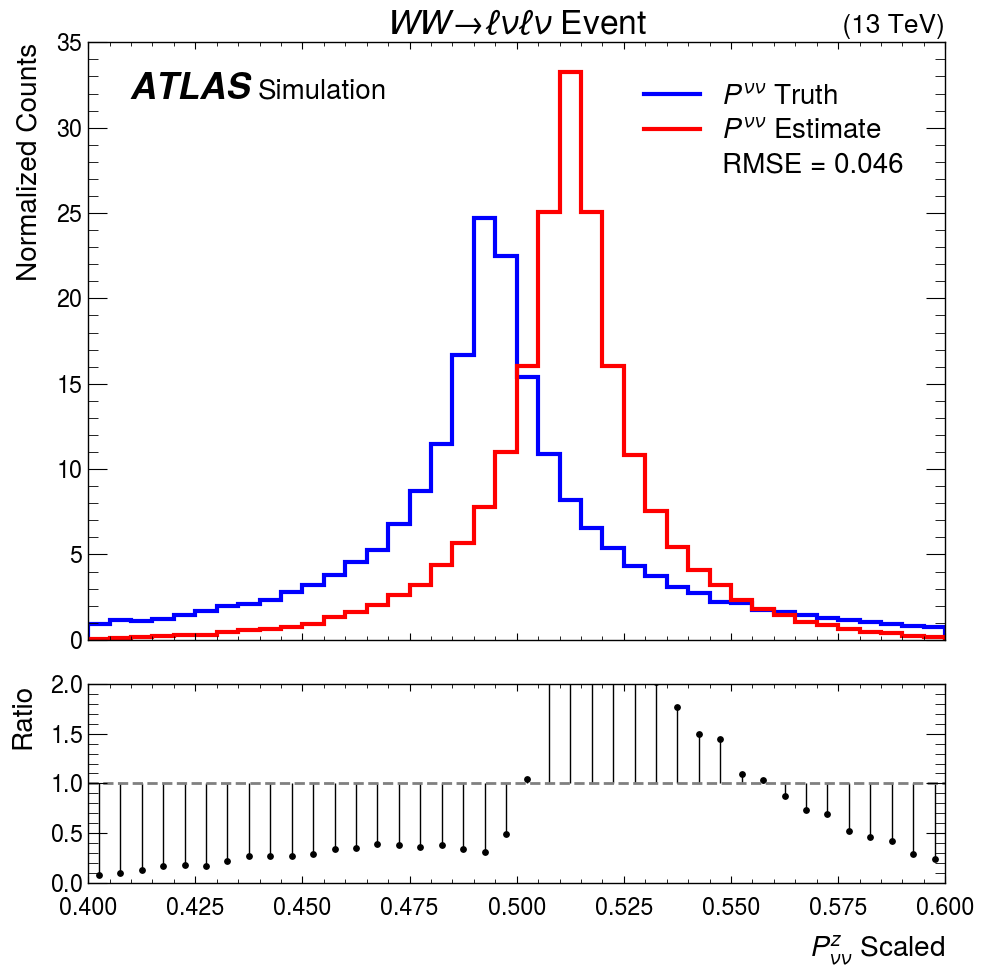

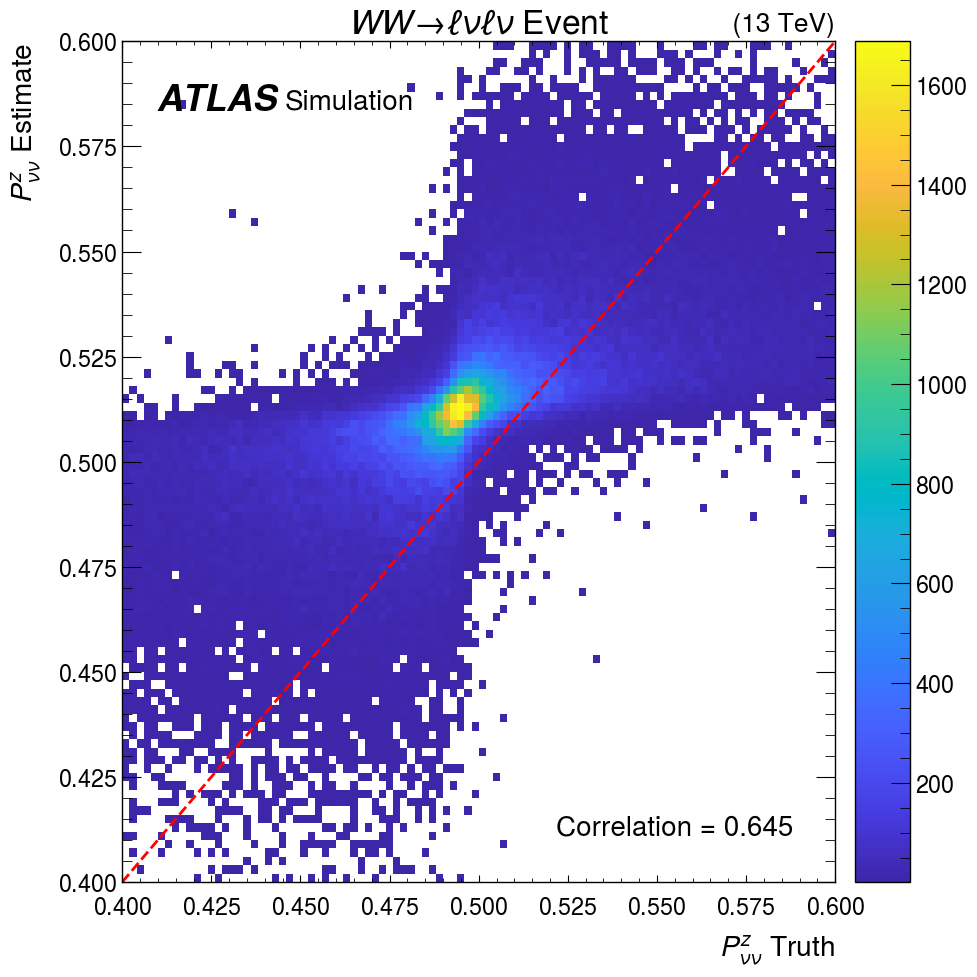

In [195]:
N_evts=100000
bkg_sample_evt = np.random.choice(len(g['truth']),N_evts,replace=False)
bkg_rms = mean_squared_error(g['truth'][bkg_sample_evt], g['pred'][bkg_sample_evt], squared=False)
bkg_cor = np.corrcoef(g['truth'][bkg_sample_evt], g['pred'][bkg_sample_evt])[0,1]
plt.style.use("default")
plt.style.use(hep.style.ATLAS)
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(10,10),gridspec_kw={'height_ratios': [6,2]},sharex=True,tight_layout=True)
ax = ax.flatten()
hep.atlas.label(ax=ax[0],loc=1,fontsize=20)
truth_bar, truth_bin = np.histogram(g['truth'][bkg_sample_evt],bins=40,range=[0.4,0.6],density=True)#,histtype='step',label = 'MET')
est_bar  ,   est_bin = np.histogram(g['pred'][bkg_sample_evt],bins=40,range=[0.4,0.6],density=True)#,histtype='step',label = 'MET')
hep.histplot(truth_bar,truth_bin,label=r'$P^{\nu\nu}$ Truth',ax=ax[0],lw=3,color='b')
hep.histplot(est_bar  ,truth_bin,label=r'$P^{\nu\nu}$ Estimate',ax=ax[0],lw=3,color='r')
ax[0].set_xlim([0.4,0.6])
ax[0].scatter(0.4,0.4,color='w',s=0.01,label=f'RMSE = {bkg_rms:.3f}')
ax[0].legend(prop={'size': 20})
ax[0].set_ylabel("Normalized Counts")
#ax[1].stairs((est_bar-truth_bar)/truth_bar,truth_bin,edgecolor='k')#,align='edge')
ax[1].vlines(truth_bin[0:-1]+(1/400),1,(est_bar)/truth_bar,color='k',lw=1)#,align='edge')
ax[1].scatter(truth_bin[0:-1]+(1/400),(est_bar)/truth_bar,color='k',lw=1,s=15,label='')#,align='edge')
ax[1].set_ylim([0,2])
ax[1].axhline(1,c='grey',ls='dashed')
ax[1].set_xlabel(r"$P^z_{\nu\nu}$ Scaled")
ax[1].set_ylabel("Ratio")
ax[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
ax[1].tick_params(axis='x',pad=10)
ax[0].set_title(r"$WW\to\ell\nu\ell\nu$ Event")
plt.show()
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(10,10),sharex=True,tight_layout=True)
ax.set_title(r"$WW\to\ell\nu\ell\nu$ Event")
hep.atlas.label(ax=ax,loc=1,fontsize=20)
bkg_z, bkg_xbin, bkg_ybin = np.histogram2d(g['truth'][bkg_sample_evt],g['pred'][bkg_sample_evt],bins=[100,100],range=[[0.4,0.6],[0.4,0.6]],density=True)#,histtype='step',label = 'MET')
hep.hist2dplot(bkg_z,bkg_xbin,bkg_ybin,ax=ax,cmin=1,cmap=parula_map)#cmap=my_cmap)
ax.set_xlabel(r"$P^z_{\nu\nu}$ Truth")
ax.set_ylabel(r"$P^z_{\nu\nu}$ Estimate")
ax.tick_params(axis='x',pad=10)
ax.axline((0.4,0.4),(0.6,0.6),color='r',ls='dashed')
ax.scatter(0.4,0.4,color='w',s=0.01,label=f'Correlation = {bkg_cor:.3f}')
ax.legend(loc=4,prop={'size': 20})
plt.show()

In [206]:
diLepton = pd.DataFrame()
diLepton['E' ] = LeptonP['lp_E' ] + LeptonM['lm_E' ]
diLepton['px'] = LeptonP['lp_px'] + LeptonM['lm_px']
diLepton['py'] = LeptonP['lp_py'] + LeptonM['lm_py']
diLepton['pz'] = LeptonP['lp_pz'] + LeptonM['lm_pz']
diLepton.head(1)



,E,px,py,pz
0,62.862242,37.846166,14.29241,6.613191


In [224]:
Higgs_mass = 125.11
def diNu_E(Z,diLep_E,diLep_px,diLep_py,diLep_pz,MET_px,MET_py,mH):
    F = (diLep_px + MET_px)**2 + (diLep_py + MET_py)**2 + (diLep_pz + Z)**2 + mH**2
    return (np.sqrt(F) - diLep_E)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
 dense_3 (Dense)             (None, 4)                 20    

In [271]:
a = [1]
b = [2,3]
print()
[pz_pred[0][0]]+input[evt_id,1::].tolist()
model = tf.keras.models.load_model('DNN_pz.h5')
model.summary()

[0.493399, 0.4370829265016259, 0.5244415554110594, 0.026596069807812563, 0.564013889734367, 0.4842697099616917, 0.48043463026447386, 0.03995027985993839, 0.4391644940806587, 0.41900835653096646, 0.5003665171350973]


In [300]:
evt_id =  np.random.choice(len(LeptonM['lm_E']),1,replace=False)[0]
pz_pred = model.predict([input[evt_id,1::].tolist()])

print('Original ',Dataset.loc[evt_id,::].tolist())
print('Transform',input[evt_id,::].tolist(),'\n')
print('Revert ',RS_x.inverse_transform(MS_x.inverse_transform([input[evt_id,::].tolist()]))[0].tolist(),'\n')

print('Prediction',pz_pred[0][0], [input[evt_id,0]][0],'\n')
print('To be reverted',[[pz_pred[0][0]]+input[evt_id,1::].tolist()][0],'\n')
#      diNeutrino.at[evt_id,'diNu_pz']
print('Reverted prediction',RS_x.inverse_transform(MS_x.inverse_transform([[pz_pred[0][0]]+input[evt_id,1::].tolist()]))[0].tolist(),'\n')

1/1 [==============================] - 0s 23ms/step
Original  [84.10963622999999, 26.148953817000002, -13.722443115, 33.73169531200001, -16.970001953, -3.3450354000000004, 28.959384766, 35.180296875, 8.114927246, 33.986726562, 4.08699585]
Transform [0.5088275254101983, 0.4871658913866709, 0.5305292212023706, 0.006634412792809371, 0.5428157244210181, 0.46692780919726995, 0.46920897771205666, 0.007584386169055895, 0.4231493798333132, 0.4403194484824646, 0.4784157701925601] 

Revert  [84.10963623000004, 26.14895381700001, -13.72244311500007, 33.73169531200001, -16.97000195300003, -3.3450354000000213, 28.959384766000078, 35.180296875, 8.11492724599998, 33.986726561999994, 4.0869958499999886] 

Prediction 0.47723886 0.5088275254101983 

To be reverted [0.47723886, 0.4871658913866709, 0.5305292212023706, 0.006634412792809371, 0.5428157244210181, 0.46692780919726995, 0.46920897771205666, 0.007584386169055895, 0.4231493798333132, 0.4403194484824646, 0.4784157701925601] 

Reverted prediction [-

In [351]:
evt_id = np.random.choice(len(f['pred']),1,replace=False)[0]
print(f['pred'][evt_id],f['truth'][evt_id])
print(np.unique(np.where(np.abs(input[::,0] - f['truth'][evt_id])<0.0000001,np.arange(len(input[::,0])),0)))
print(np.unique(np.where(np.abs(input[::,0] - f['pred'][evt_id])<0.0000001,np.arange(len(input[::,0])),0)))
#a = 75532
#b = 26584
#print(input[a,0],Dataset.iat[a,0],Dataset.iat[b,0])

0.49674827 0.4894511094388741
[      0   77390  366780  432131  489227 1057776 1119220]
[     0  77682 119768 128383 542126 566254 584649 958848]


In [394]:
evt_id

1085535

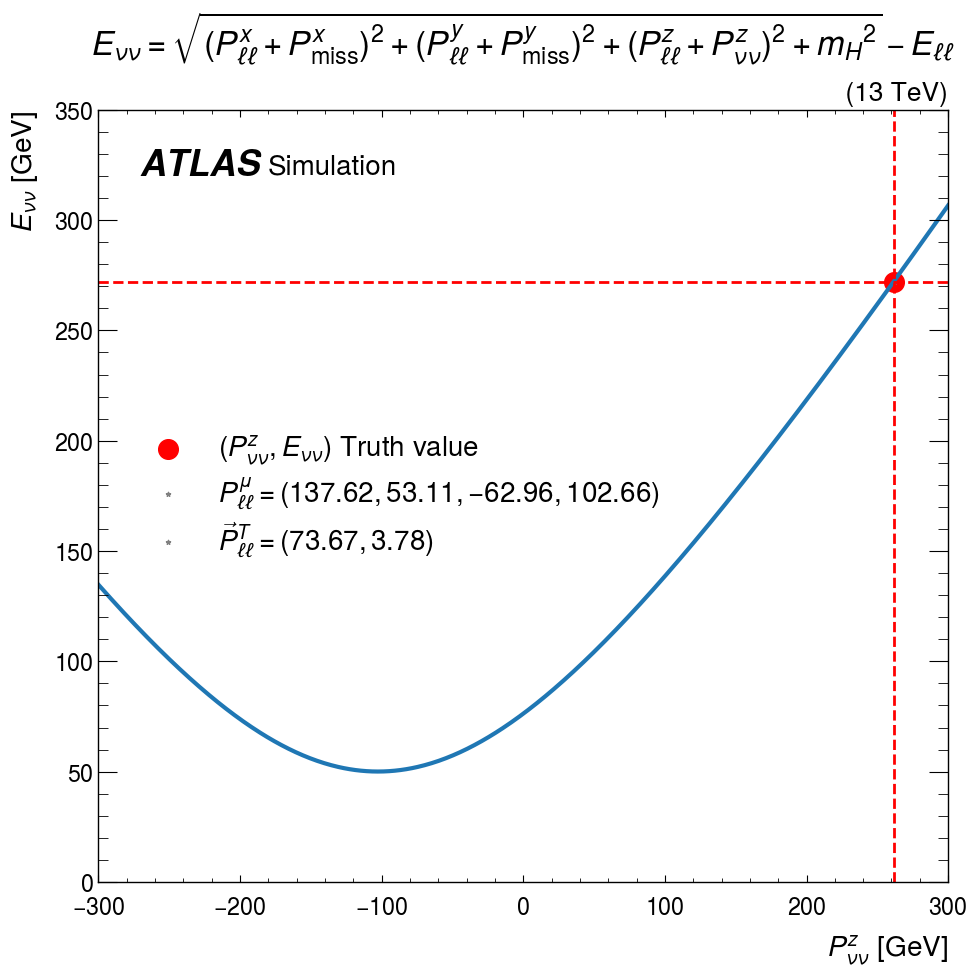

In [411]:
#evt_id =  np.random.choice(len(LeptonM['lm_E']),1,replace=False)[0]

diNu_pz = np.linspace(-300,300,600)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10),tight_layout=True)
hep.atlas.label(ax=ax,loc=1,fontsize=20)
ax.plot(diNu_pz,diNu_E(diNu_pz,\
                       diLepton.at[evt_id,'E'],diLepton.at[evt_id,'px'],diLepton.at[evt_id,'py'],diLepton.at[evt_id,'pz'],\
                       MET.at[evt_id,'MET_px'],MET.at[evt_id,'MET_py'],Higgs_mass),lw=3)
ax.scatter(diNeutrino.at[evt_id,'diNu_pz'],diNeutrino.at[evt_id,'diNu_E'],s=200,c='r',label=r'$(P^z_{\nu\nu},E_{\nu\nu})$ Truth value')
ax.axvline(diNeutrino.at[evt_id,'diNu_pz'],ls='dashed',lw=2,c='r')
ax.axhline(diNeutrino.at[evt_id,'diNu_E'],ls='dashed',lw=2,c='r')
ax.scatter(diNeutrino.at[evt_id,'diNu_pz'],diNeutrino.at[evt_id,'diNu_E'],marker='*',s=10,c='grey',\
           label=r'$P^\mu_{\ell\ell}=({%.2f},{%.2f},{%.2f},{%.2f})$'%(diLepton.at[evt_id,'E'],diLepton.at[evt_id,'px'],diLepton.at[evt_id,'py'],diLepton.at[evt_id,'pz']))
ax.scatter(diNeutrino.at[evt_id,'diNu_pz'],diNeutrino.at[evt_id,'diNu_E'],marker='*',s=10,c='grey',\
           label=r'$\vec{P}^T_{\ell\ell}=({%.2f},{%.2f})$'%(MET.at[evt_id,'MET_px'],MET.at[evt_id,'MET_py']))
ax.set_xlabel(r'$P^z_{\nu\nu}$ [GeV]')
ax.set_ylabel(r'$E_{\nu\nu}$ [GeV]')
ax.tick_params(axis='x',pad=10)
plt.legend(loc=6,prop={'size':20})
ax.set_title(r'$E_{\nu\nu} = \sqrt{(P^x_{\ell\ell}+P^x_\mathrm{miss})^2 +(P^y_{\ell\ell}+P^y_\mathrm{miss})^2 +(P^z_{\ell\ell}+P^z_{\nu\nu})^2 + {m_H}^2} - E_{\ell\ell}$',pad=40,fontsize=24)
plt.show()

['pt', 'px', 'py', 'phi']